In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from datetime import datetime, timedelta

%matplotlib inline

Fraud Detection for Online Payment Platform

Overview
The Fraud Detection dataset is a crucial asset for our business, providing valuable insights and opportunities for enhancing the security and trustworthiness of our online payment platform. This dataset represents transactions and user-related data collected over time from our platform. The primary goal is to develop an advanced predictive model to identify potentially fraudulent transactions.

Context
Our online payment platform processes millions of transactions daily, making it vulnerable to various types of fraudulent activities. These activities pose a significant threat to both our business and our customers. To safeguard our platform and enhance user experience, we aim to leverage the power of data science and machine learning to proactively detect and prevent fraudulent transactions.

Objectives
- Fraud Detection Model: You are required to build an advanced machine learning model to predict whether a given transaction is potentially fraudulent or not. This model will be vital for real-time decision-making, allowing us to flag and investigate suspicious activities promptly.

In [3]:
fraud_df = pd.read_csv(r'/content/drive/MyDrive/DataFest Datathon/Copy of FraudDetectionDataset.csv')

In [ ]:
print(fraud_df.shape)
fraud_df.head()

(6000000, 32)


,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,...,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,...,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,...,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,...,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,...,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


In [ ]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   User ID                            int64  
 2   Transaction Amount                 float64
 3   Transaction Date and Time          object 
 4   Merchant ID                        int64  
 5   Payment Method                     object 
 6   Country Code                       object 
 7   Transaction Type                   object 
 8   Device Type                        object 
 9   IP Address                         object 
 10  Browser Type                       object 
 11  Operating System                   object 
 12  Merchant Category                  object 
 13  User Age                           int64  
 14  User Occupation                    object 
 15  User Income                        float64
 16  User Gender       

In [ ]:
fraud_df.isnull().sum()

Transaction ID                       0
User ID                              0
Transaction Amount                   0
Transaction Date and Time            0
Merchant ID                          0
Payment Method                       0
Country Code                         0
Transaction Type                     0
Device Type                          0
IP Address                           0
Browser Type                         0
Operating System                     0
Merchant Category                    0
User Age                             0
User Occupation                      0
User Income                          0
User Gender                          0
User Account Status                  0
Transaction Status                   0
Location Distance                    0
Time Taken for Transaction           0
Transaction Time of Day              0
User's Transaction History           0
Merchant's Reputation Score          0
User's Device Location               0
Transaction Currency     

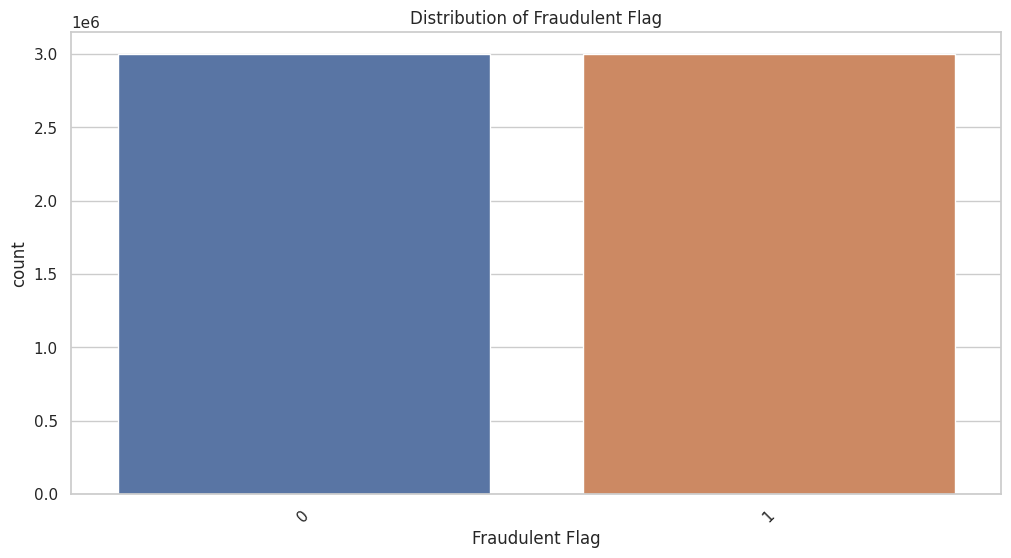

0    0.500016
1    0.499984
Name: Fraudulent Flag, dtype: float64

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=fraud_df, x='Fraudulent Flag')
plt.xticks(rotation=45)
plt.title('Distribution of Fraudulent Flag')
plt.show()

fraud_df['Fraudulent Flag'].value_counts(normalize=True)

From the distribution of the Fraudulent Flag , It can be seen that the ratio of those transaction that are considered fraud and those that are not ia 50%

Which means our dataset target distribution is balanced

In [ ]:
#Descriptive Statistic of first_df
pd.options.display.float_format =  "{:.2f}".format #Convert Scientific Notations to numerical
fraud_df.describe()

,Transaction ID,User ID,Transaction Amount,Merchant ID,User Age,User Income,Location Distance,Time Taken for Transaction,User's Transaction History,Merchant's Reputation Score,User's Credit Score,Merchant's Business Age,Fraudulent Flag
count,6000000.00,6000000.00,6000000.00,6000000.00,6000000.00,6000000.00,6000000.00,6000000.00,6000000.00,6000000.00,6000000.00,6000000.00,6000000.00
mean,55019059.60,5499.57,500.55,5500.82,49.00,50493.28,50.51,30.49,50.48,3.00,574.95,10.50,0.50
std,25980671.71,2598.74,288.42,2598.35,18.19,28582.23,28.58,17.04,28.87,1.15,159.02,5.76,0.50
min,10000041.00,1000.00,1.00,1000.00,18.00,1000.02,1.00,1.00,1.00,1.00,300.00,1.00,0.00
25%,32516659.75,3248.00,250.79,3251.00,33.00,25734.46,25.76,15.74,25.00,2.00,437.00,5.00,0.00
50%,55029874.00,5499.00,500.51,5501.00,49.00,50502.94,50.51,30.50,50.00,3.00,575.00,10.00,0.00
75%,77524866.25,7751.00,750.44,7752.00,65.00,75234.54,75.25,45.26,75.00,4.00,713.00,15.00,1.00
max,99999883.00,9999.00,1000.00,9999.00,80.00,100000.00,100.00,60.00,100.00,5.00,850.00,20.00,1.00


In [4]:
#Converting date column to datetime
fraud_df['Transaction Date and Time'] = pd.to_datetime(fraud_df['Transaction Date and Time'])


In [6]:
fraud_df['Transaction Date and Time'].describe()

<ipython-input-6-3c907c8514cc>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  fraud_df['Transaction Date and Time'].describe()


count                 6000000
unique                5783314
top       2021-03-13 20:34:16
freq                        5
first     2021-01-01 00:00:34
last      2023-07-30 23:59:56
Name: Transaction Date and Time, dtype: object

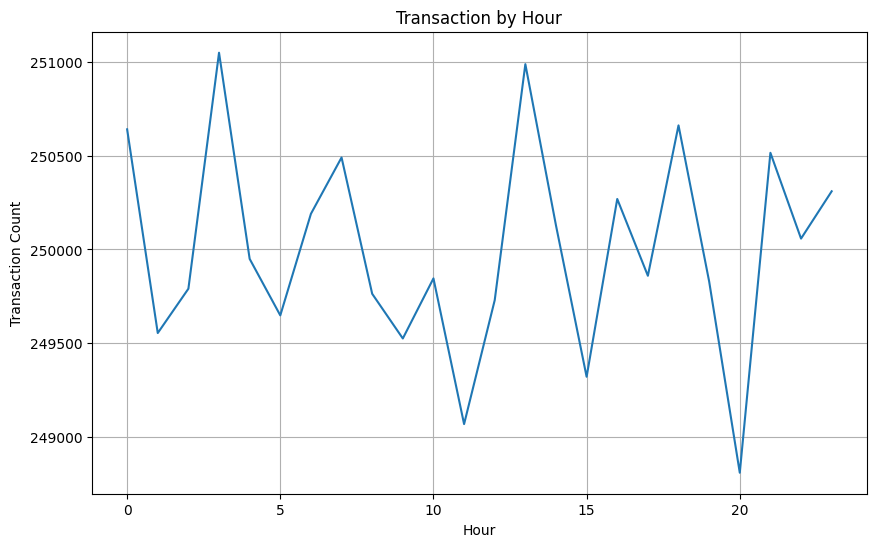

In [11]:
  #Which type of transactions are considered fraudulent
# Extract hour of the day (0-23)
fraud_df['hour'] = fraud_df['Transaction Date and Time'].dt.hour


#Group by date and count the number of transactions
transaction_by_date = fraud_df.groupby(fraud_df['hour'])['Transaction ID'].count().reset_index(name='Transaction Count')

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(transaction_by_date['hour'], transaction_by_date['Transaction Count'], linestyle='-')

# Customize the chart
plt.title('Transaction by Hour')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.grid(True)

plt.show()

<ipython-input-6-8ba5597865e0>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = user_behavior_data.corr()


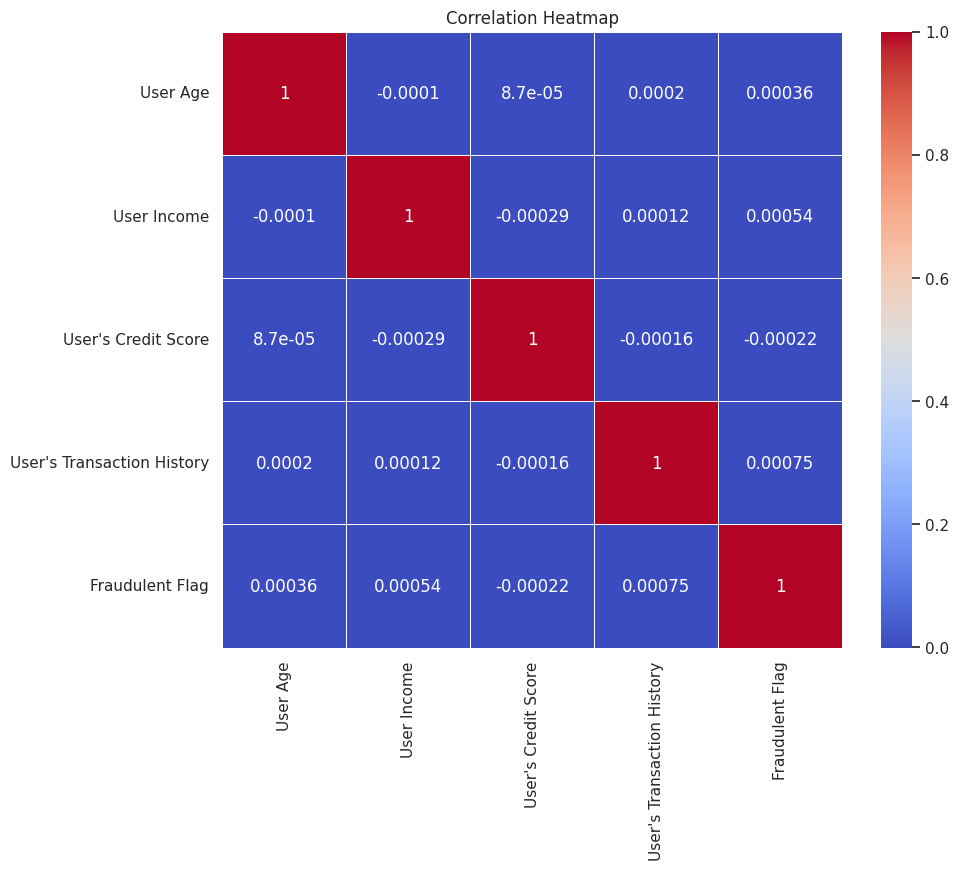

In [ ]:

# Select relevant columns for correlation analysis
columns_of_interest = ['User Age',"User Income", "User's Credit Score","User's Device Location",'User Occupation', 'User Gender', 'User Account Status',"User's Transaction History", 'Fraudulent Flag']

# Create a subset DataFrame
user_behavior_data = fraud_df[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = user_behavior_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
user_behavior_data.head()

,User Age,User Income,User's Credit Score,User's Device Location,User Occupation,User Gender,User Account Status,User's Transaction History,Fraudulent Flag
0,68,66826.21,343,United Kingdom,Doctor,Prefer Not to Say,Pro,26,0
1,22,89356.71,688,Mexico,Chemist,Genderqueer,Pending Approval,60,1
2,71,58438.63,371,Qatar,Nurse,Male,Pro,81,1
3,78,3426.92,687,Spain,Nurse,Agender,Premium,18,1
4,31,53080.12,605,Israel,Physicist,Male,Free,98,1


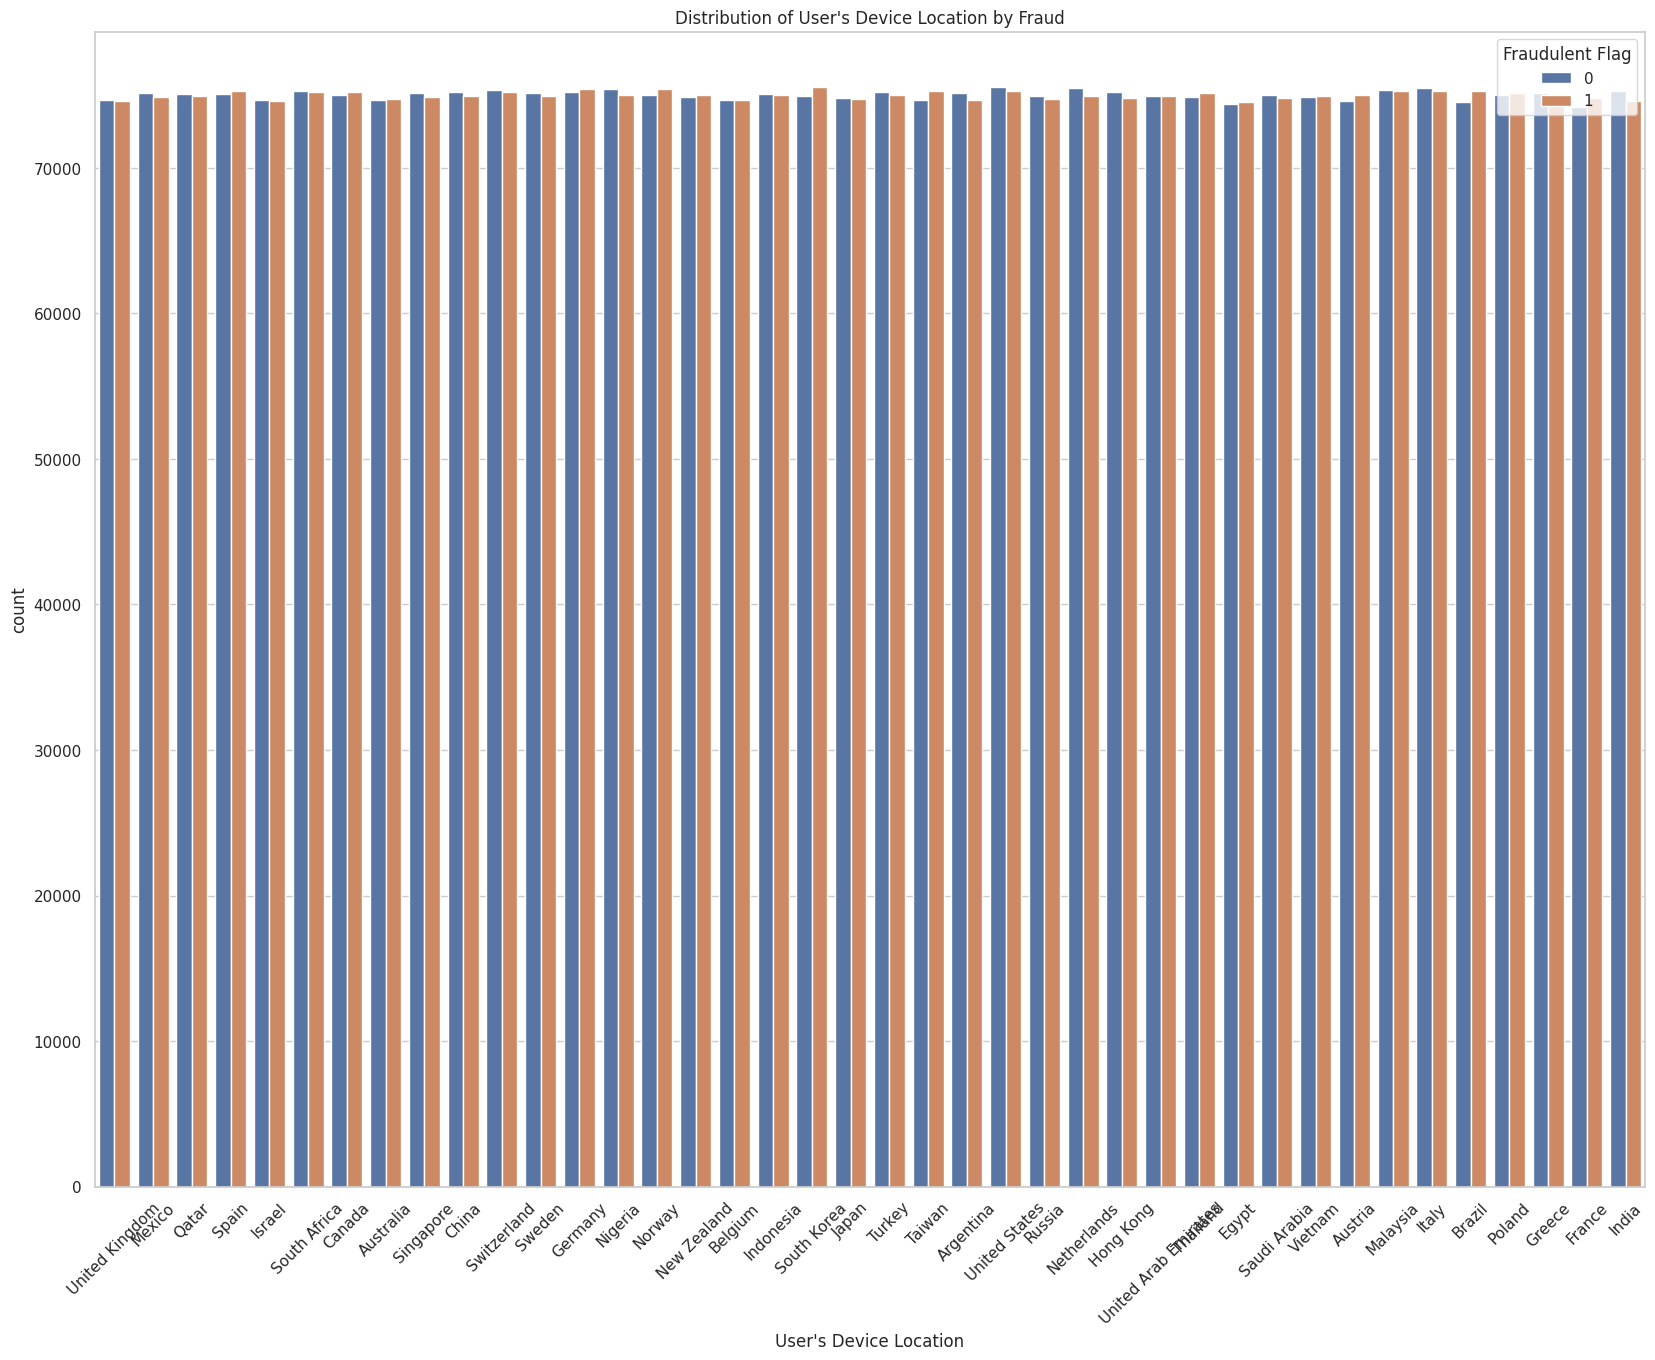

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.countplot(data=user_behavior_data, x="User's Device Location", hue="Fraudulent Flag")
plt.xticks(rotation=45)
plt.title("Distribution of User's Device Location by Fraud")
plt.show()

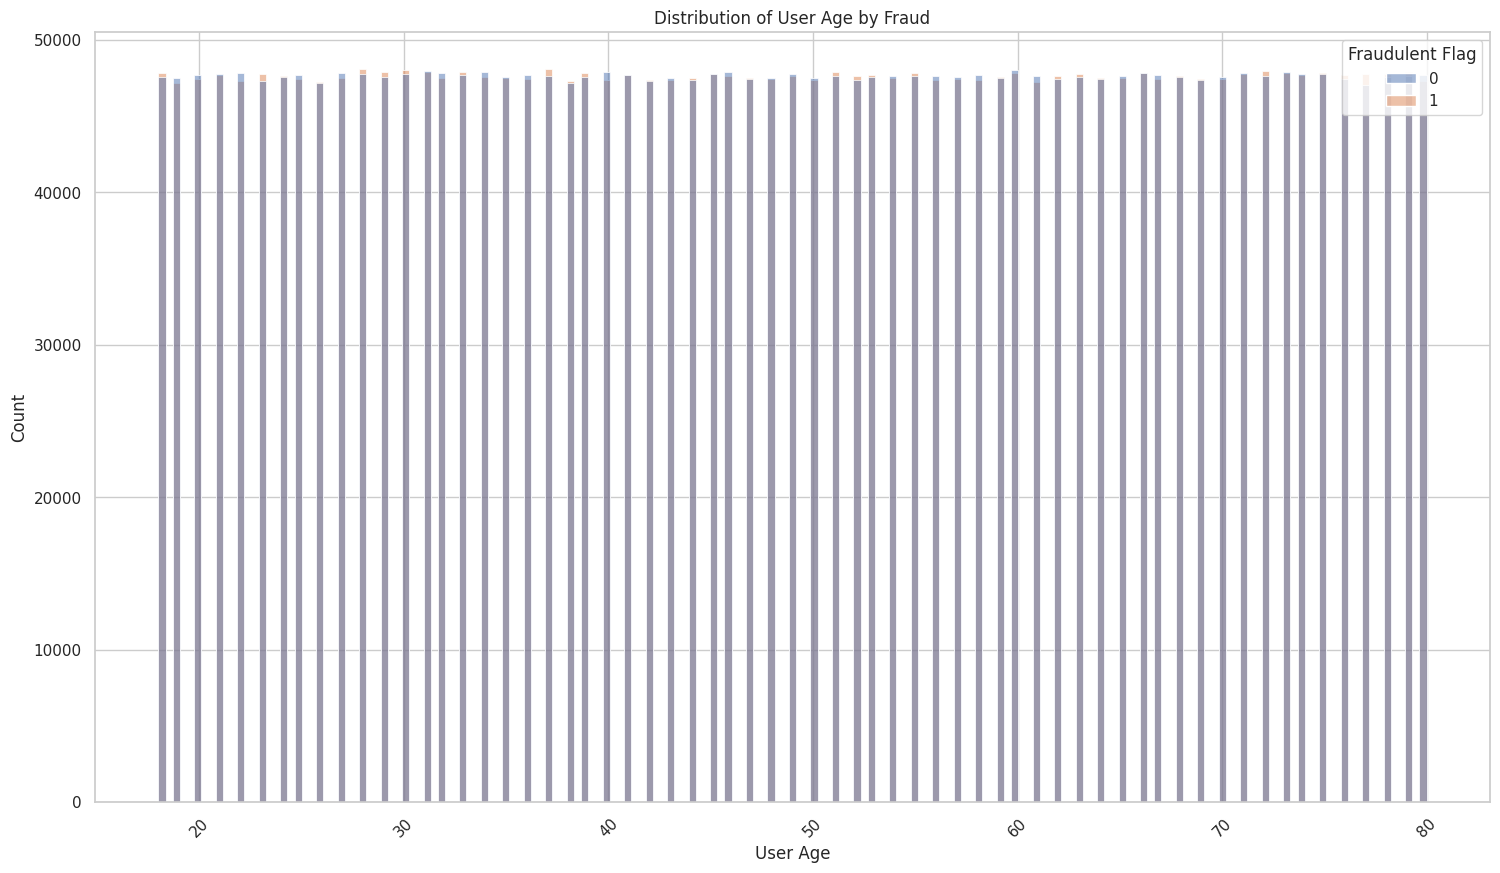

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))
sns.histplot(data=user_behavior_data, x="User Age", hue="Fraudulent Flag")
plt.xticks(rotation=45)
plt.title("Distribution of User Age by Fraud")
plt.show()

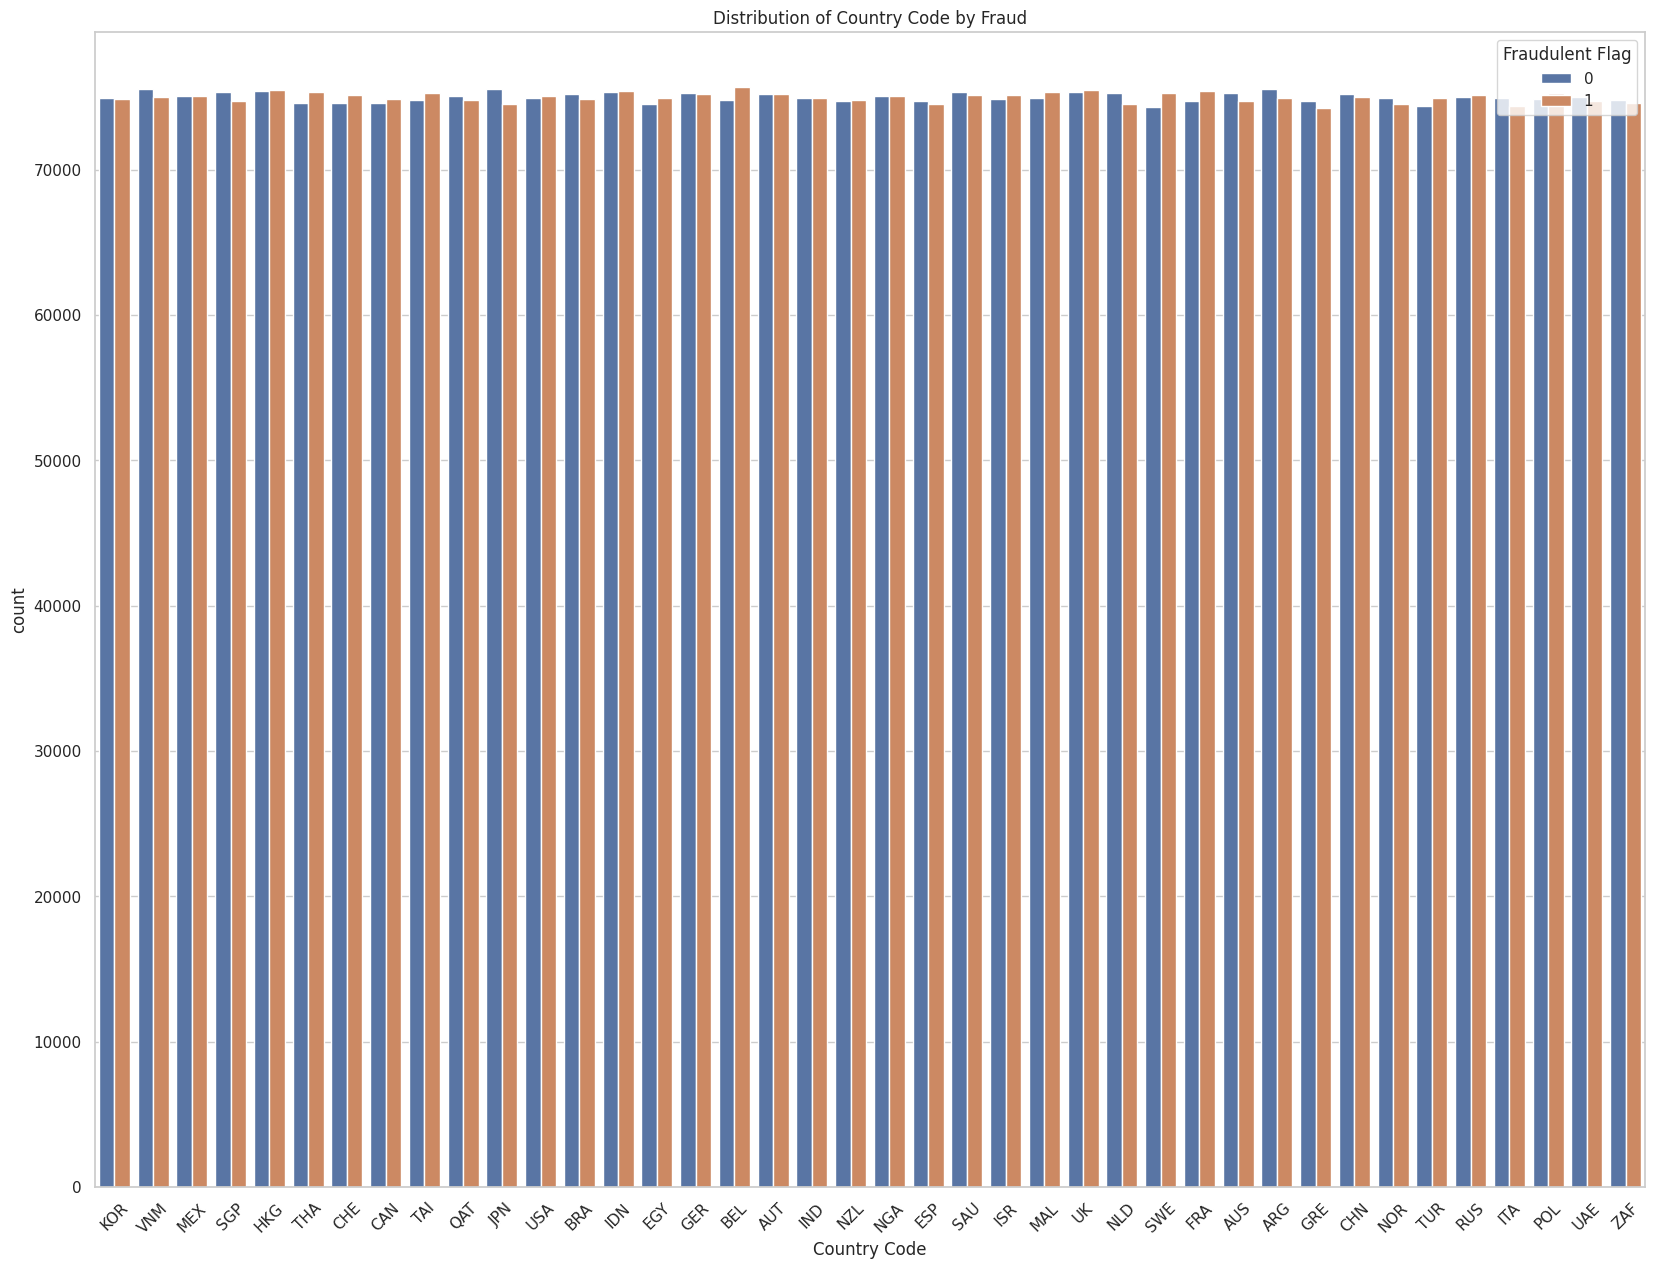

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.countplot(data=fraud_df, x="Country Code", hue="Fraudulent Flag")
plt.xticks(rotation=45)
plt.title("Distribution of Country Code by Fraud")
plt.show()


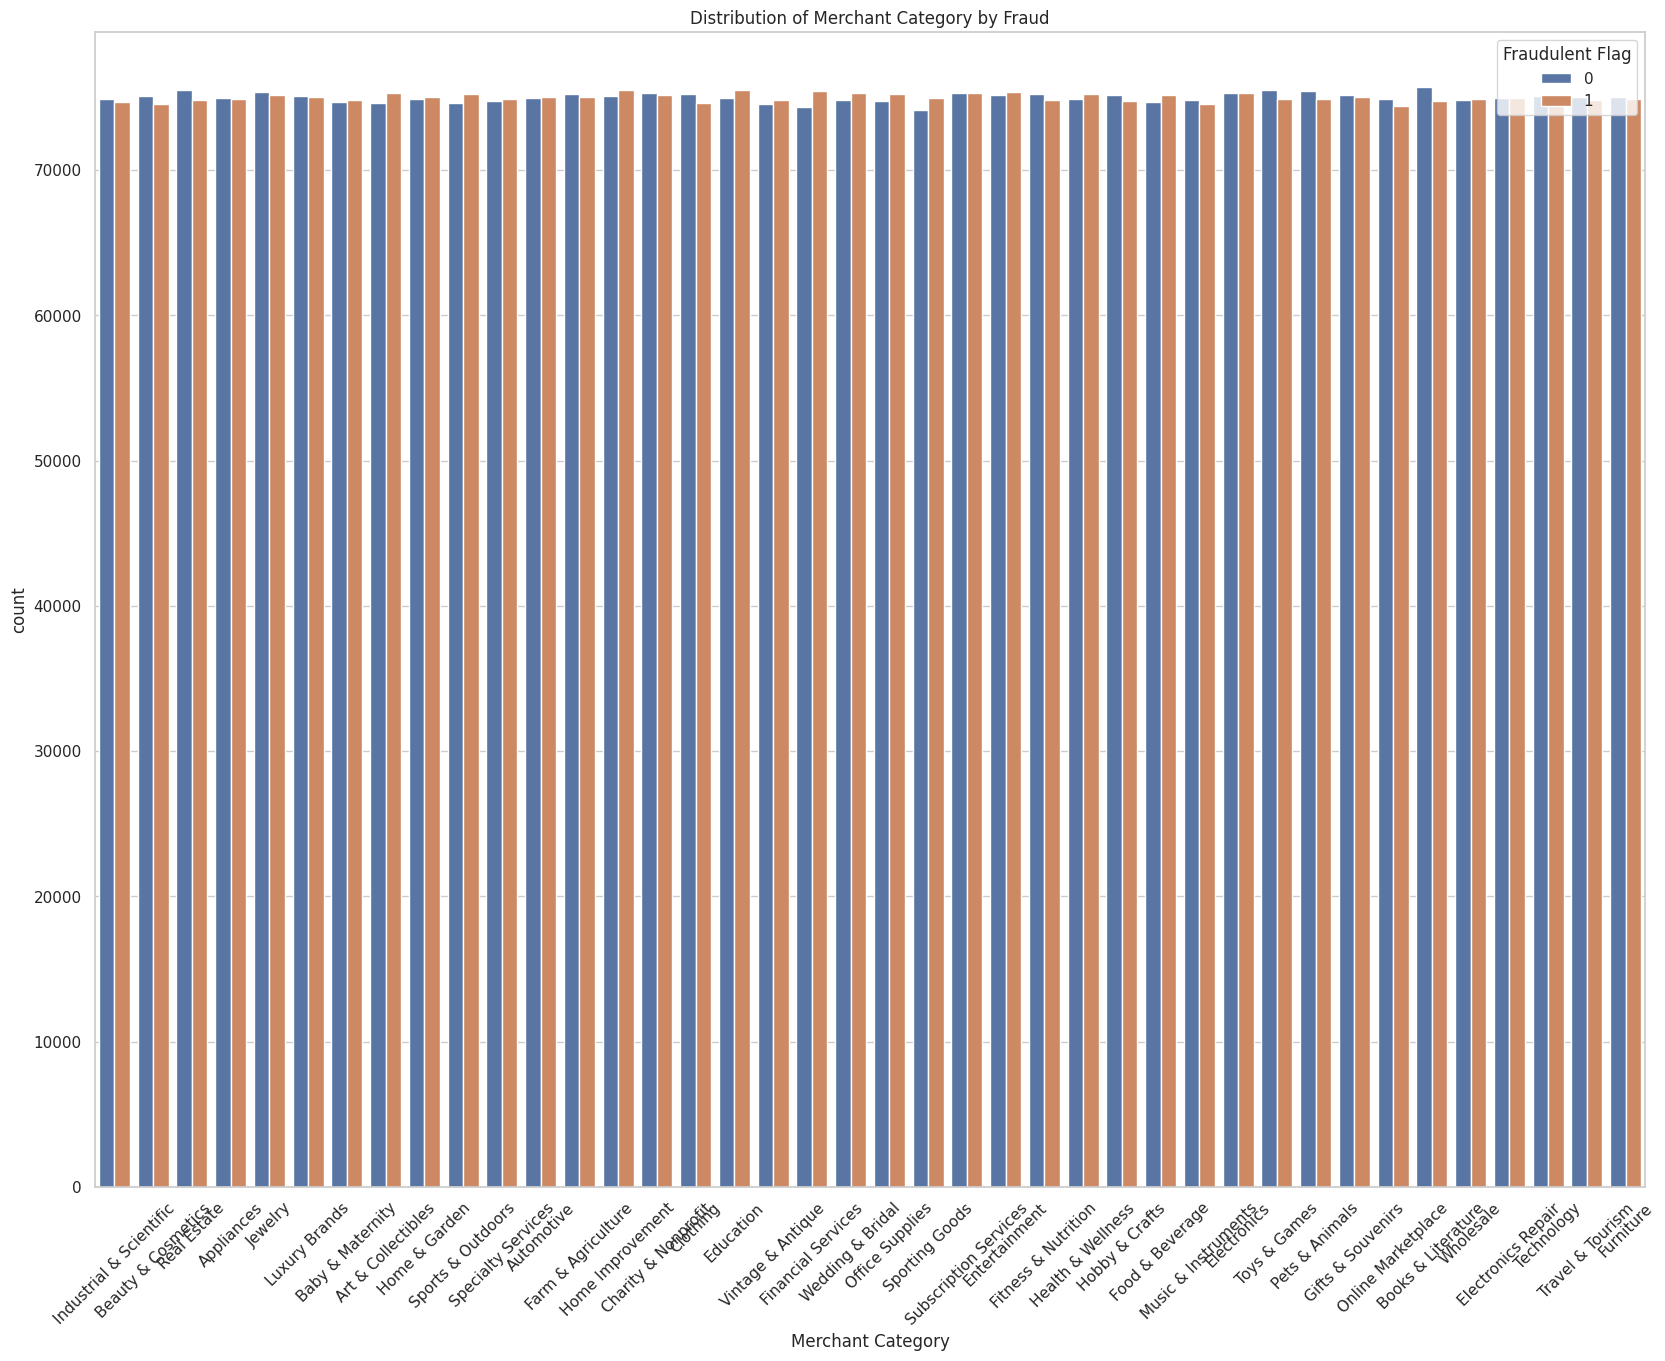

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.countplot(data=fraud_df, x="Merchant Category", hue="Fraudulent Flag")
plt.xticks(rotation=45)
plt.title("Distribution of Merchant Category by Fraud")
plt.show()

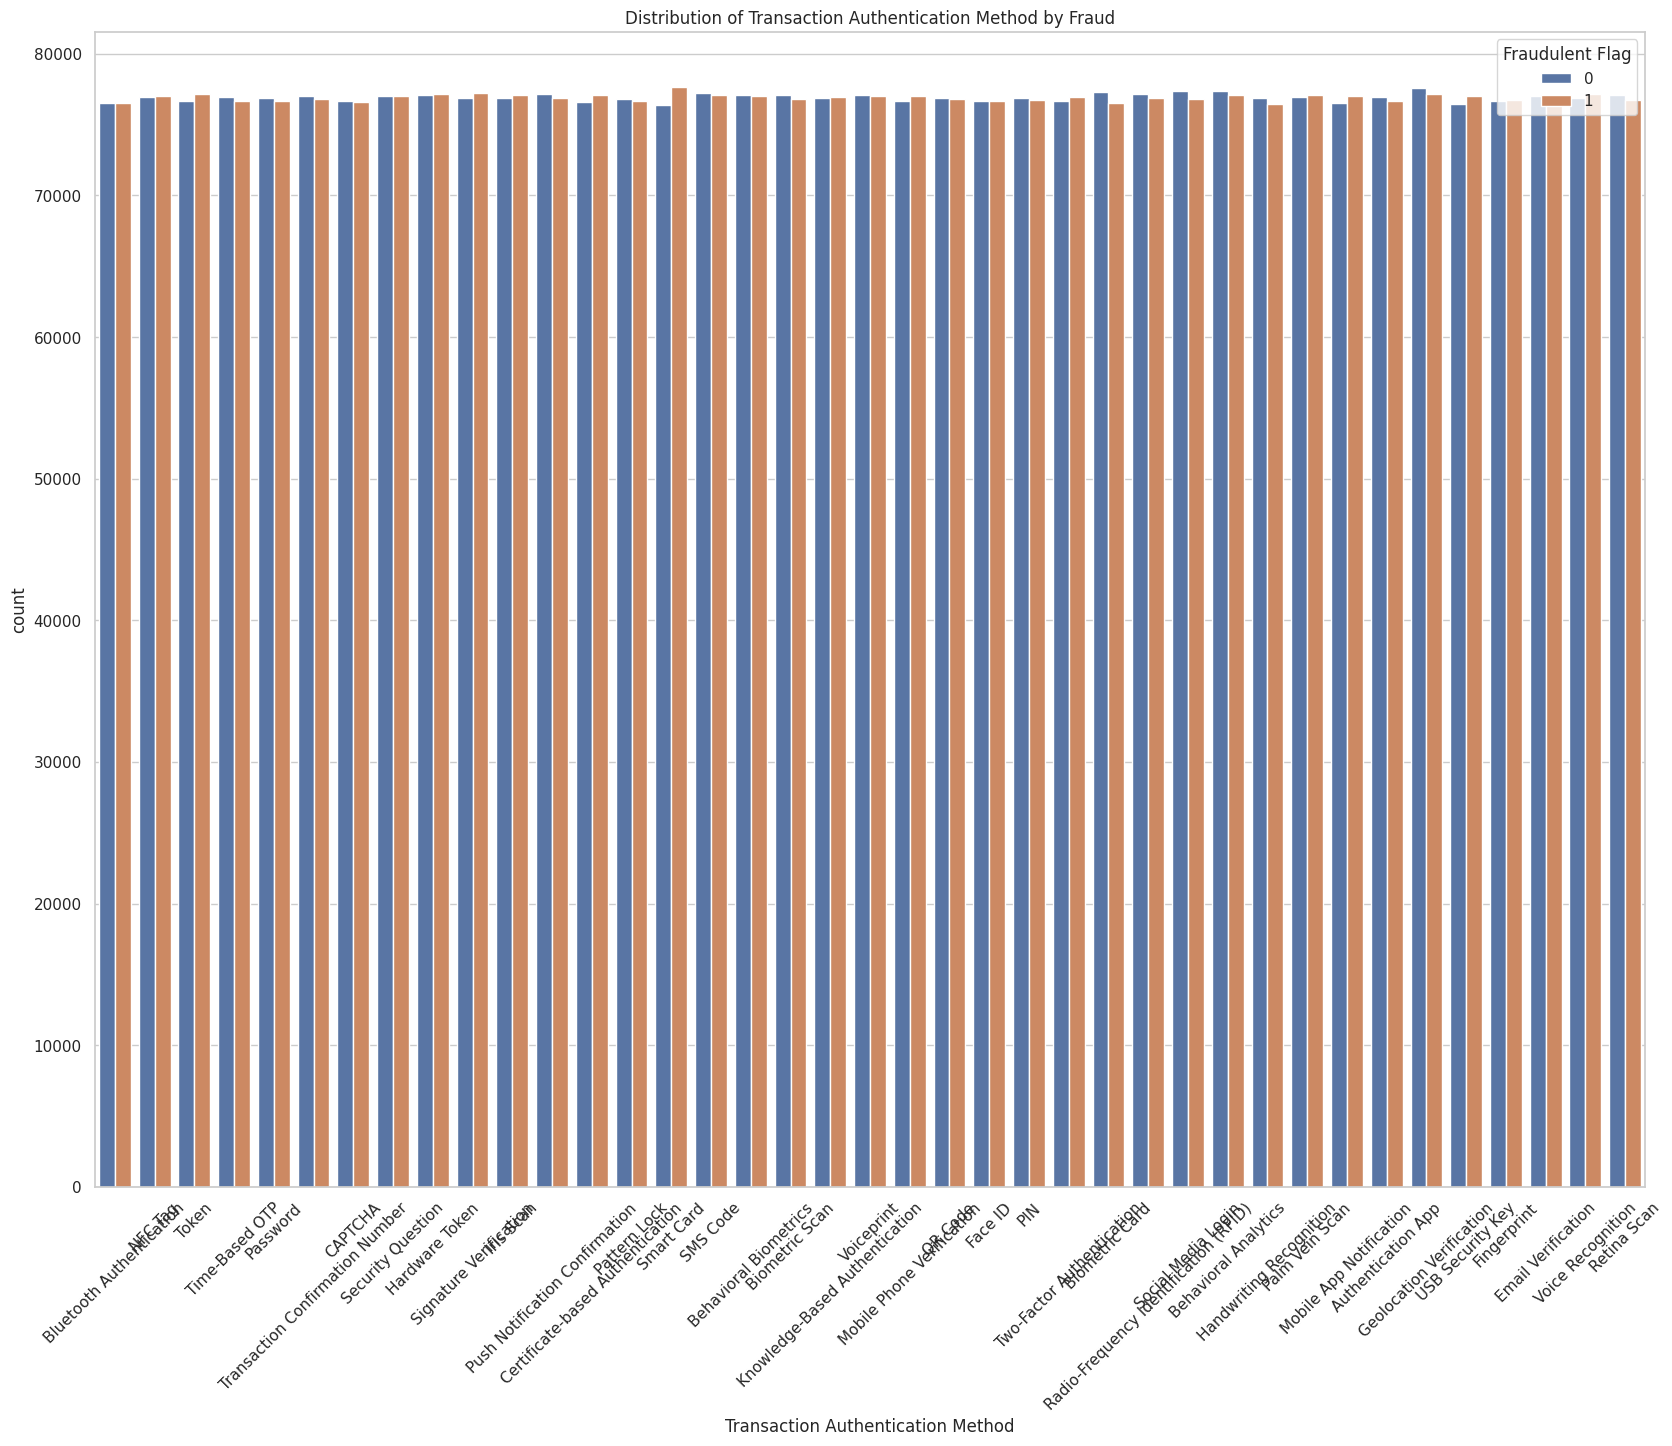

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.countplot(data=fraud_df, x="Transaction Authentication Method", hue="Fraudulent Flag")
plt.xticks(rotation=45)
plt.title("Distribution of Transaction Authentication Method by Fraud")
plt.show()


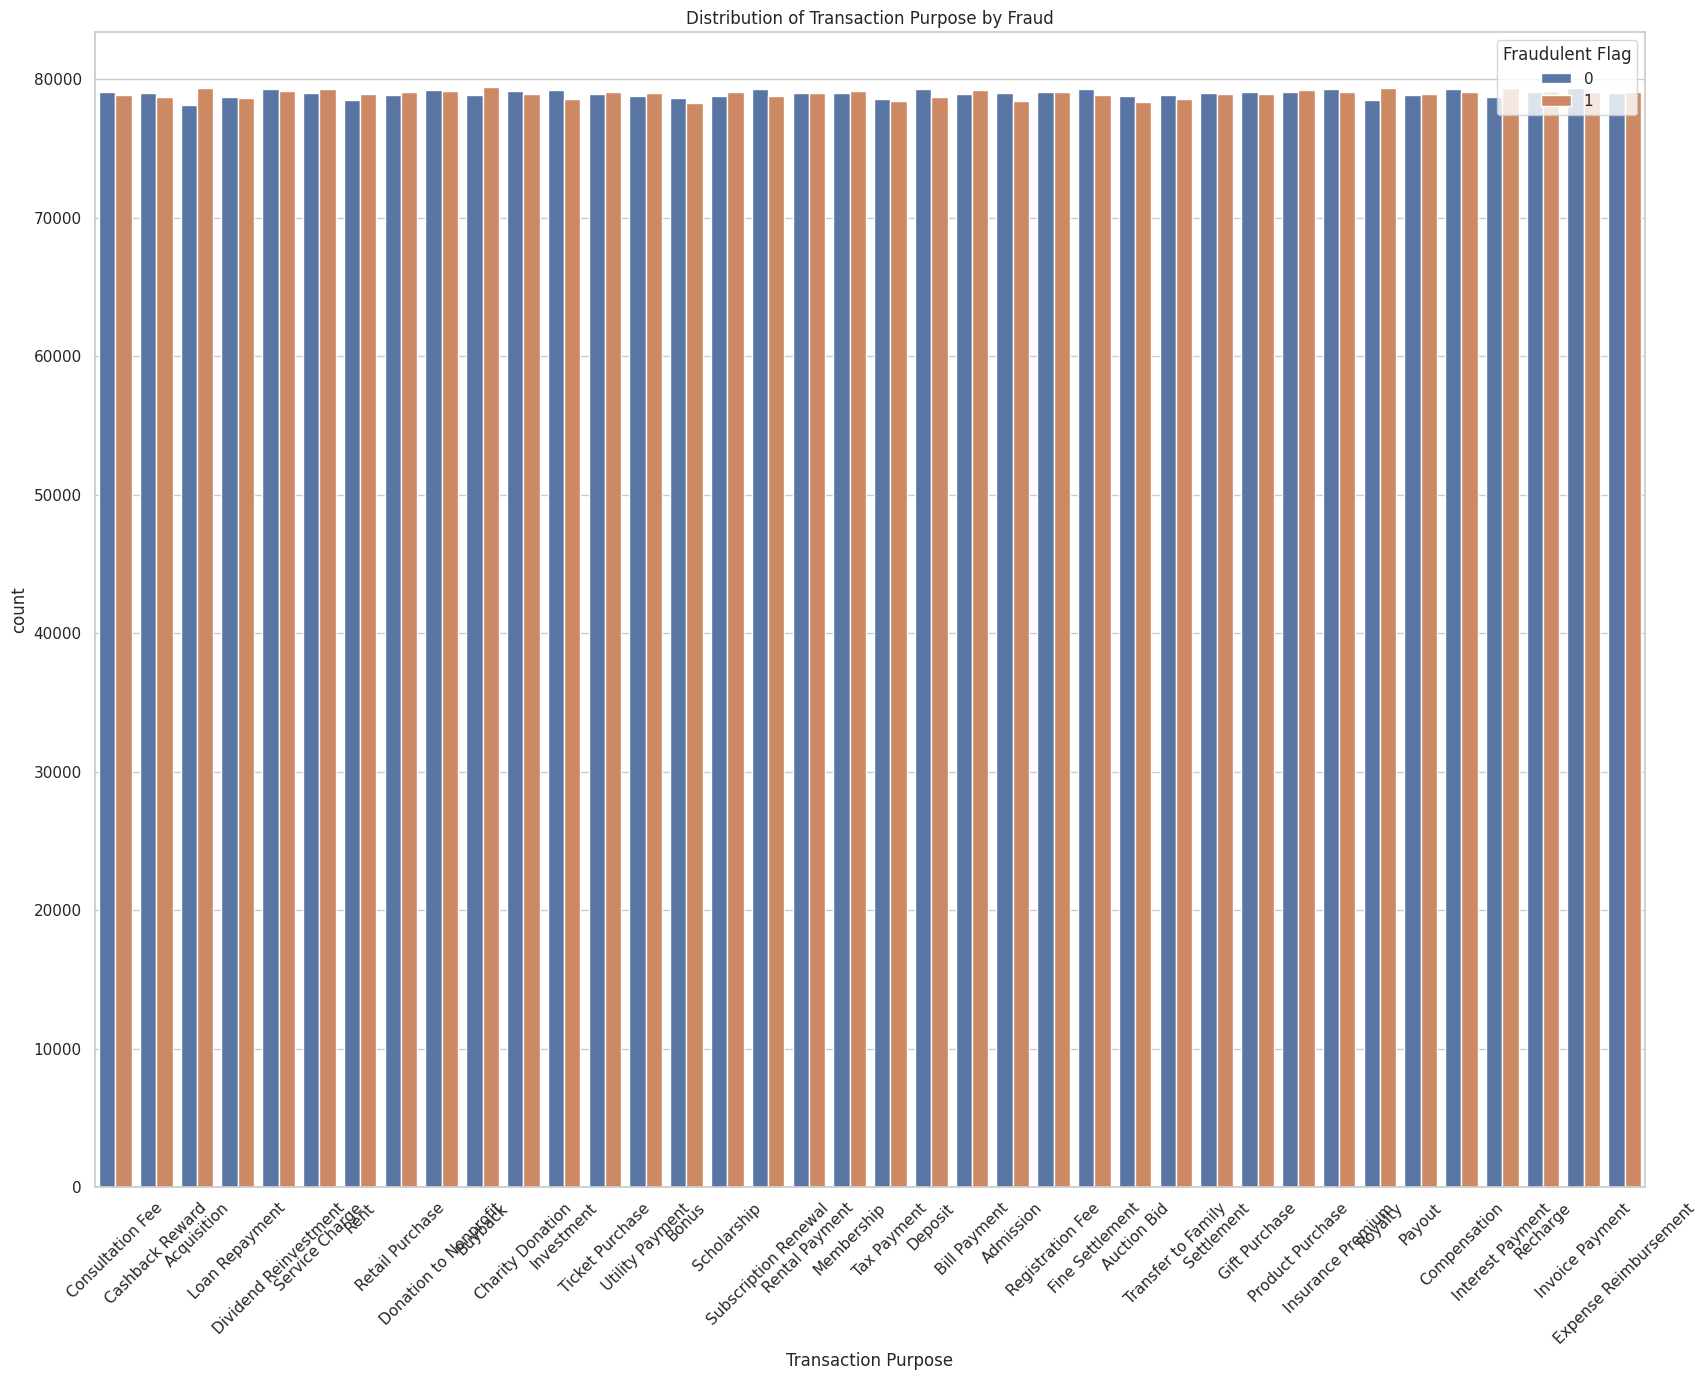

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.countplot(data=fraud_df, x="Transaction Purpose", hue="Fraudulent Flag")
plt.xticks(rotation=45)
plt.title("Distribution of Transaction Purpose by Fraud")
plt.show()


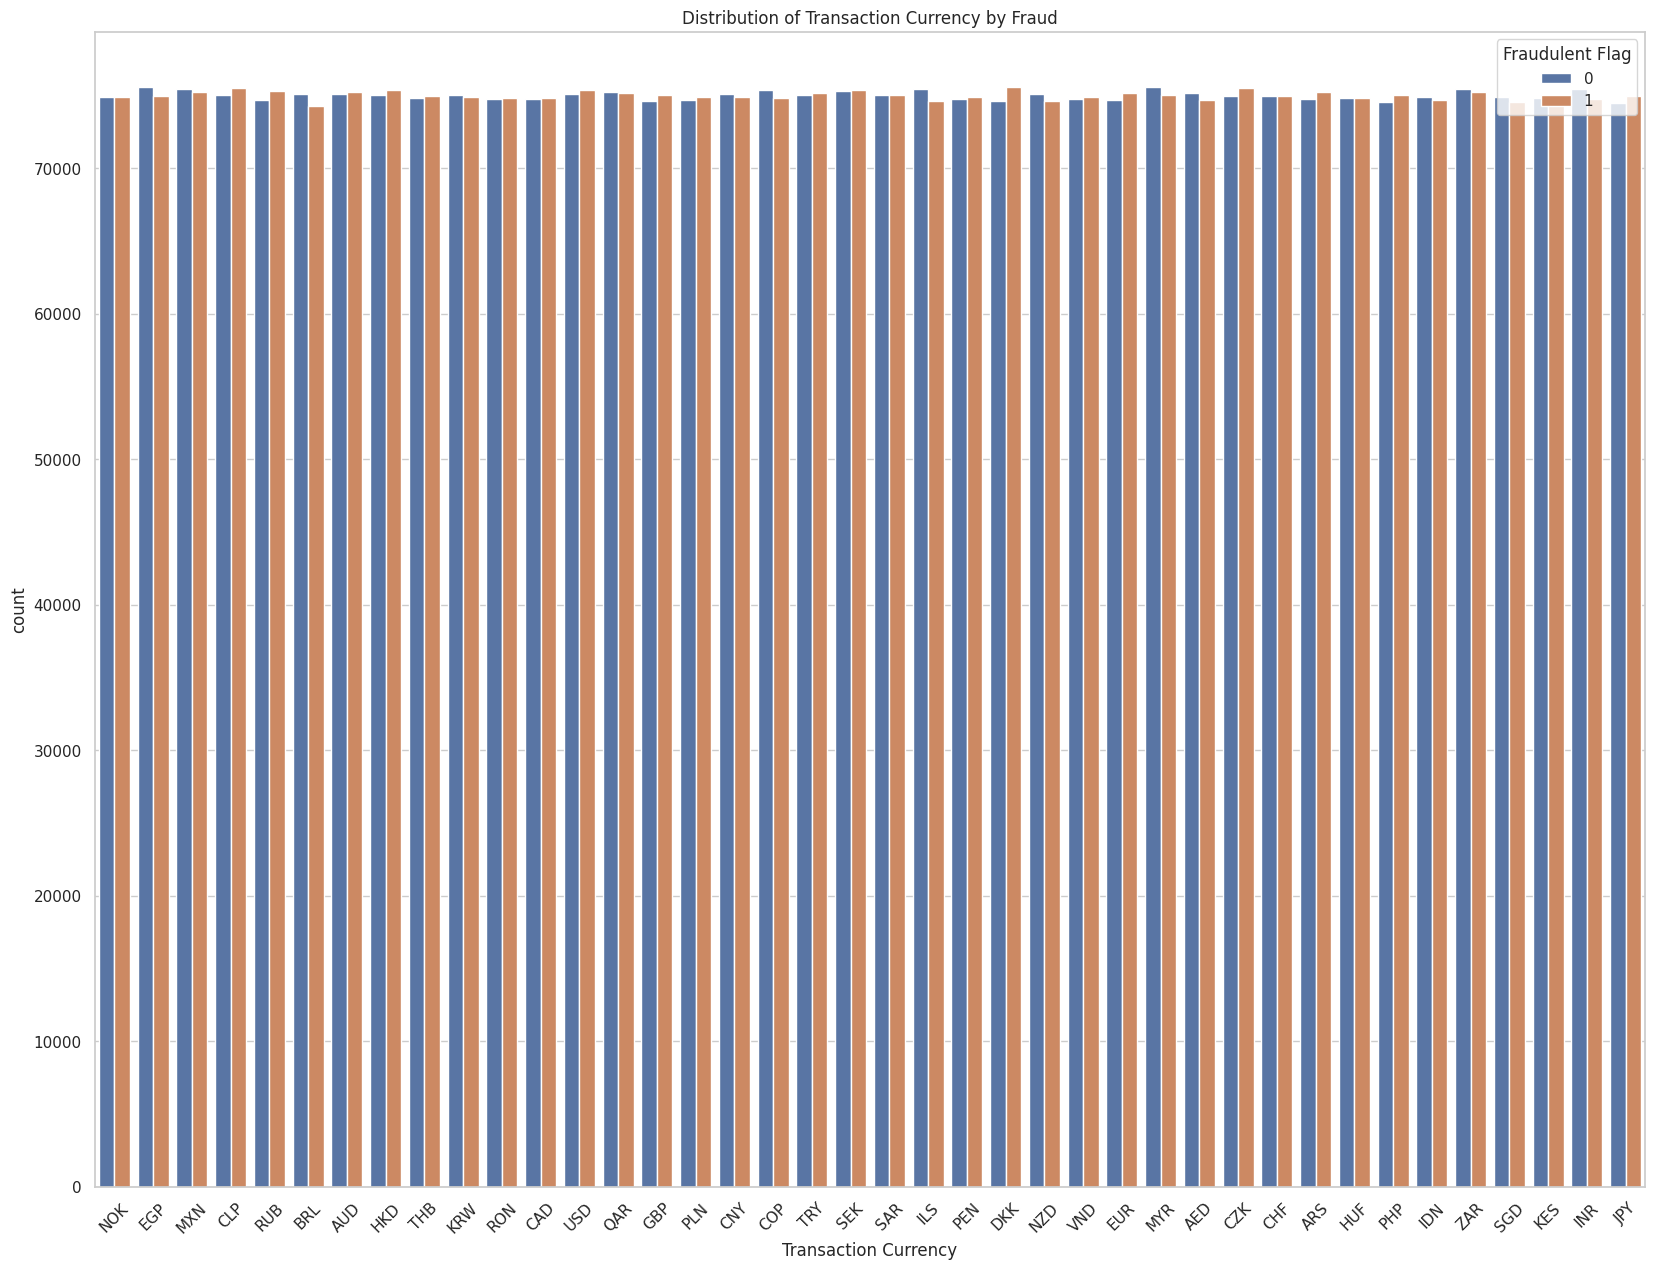

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.countplot(data=fraud_df, x="Transaction Currency", hue="Fraudulent Flag")
plt.xticks(rotation=45)
plt.title("Distribution of Transaction Currency by Fraud")
plt.show()


After Several Analysis , i discovered that the dataset is abalanced accross all features , the values for those transactions that are fraudulent and the ones that are not fraudulent are roughly the same . I also noticed that most of the categorical features are having high categories